# Analysis

This Jupyter Notebook contains the steps taken to analyze the topics that were of interest to us and plot them against time. 

<h2>1. Data import</h2>

Since topic analysis was done at a later point in time, the tokenized text chunks were saved in a compressed format and imported again later, along with the two created topic models. `texts_final` contains the text chunks after they were cleared of stop words so that the text output below is somewhat hard to read.

In [2]:
import pickle, gensim

Load array of tokenized and cleared texts:

In [3]:
texts_final = pickle.load(open("texts_final_400w.p", "rb"))

Create dictionary and corpus:

In [4]:
dictionary = gensim.corpora.Dictionary(texts_final)
corpus = [dictionary.doc2bow(text) for text in texts_final]

In [5]:
len(corpus)

200577

As described in the other notebook, we used a reduced version of the corpus to save computing time and increase stability.

In [6]:
corpus_red = [corpus[i] for i in range(0,len(corpus),5)]

In [7]:
len(corpus_red)

40116

To load the topic model:

In [ ]:
#tm59 = gensim.models.LdaModel.load('tm59_reduced')

In [13]:
tm29 = gensim.models.LdaModel.load('tm29')

Load visualization:

In [1]:
from IPython.display import HTML
HTML(filename='topicmodel29_reduced.html')

<h2>2. Topic selection and interpretation</h2>

The first step in searching our corpus for the topic of Islam was to find out which topics generated by the model might be interpreted as Islam-related topics at all. To achieve this, we chose keywords likely to be associated with the topic of Islam and used the function `get_term_topics()` to return the topics most likely to contain these keywords.

<h3>Most relevant topics for some Islam-related terms in tm29</h3>

In [18]:
from gensim.models.ldamodel import *

DTYPE_TO_EPS = {
    np.float16: 1e-5,
    np.float32: 1e-5,      # <<<< I increased this from e-35
    np.float64: 1e-100,
}

#increasing the epsilon value fixes a bug with get_term_topics method

In [19]:
tm29.get_term_topics('islam', minimum_probability=0.0)

[]

Nothing! Strange. I suppose it's possible that the word 'Islam' somehow got sorted out of the dataset? Although that seems unlikely.

In [20]:
tm29.get_term_topics('turk', minimum_probability=0.0)

[(13, 7.040428e-05), (18, 0.00046038834)]

That's better! The topics in which 'Turk' is most likely to show up are 13 and 18. (Note that these topics are displayed as topic 14 and 19 in our pyLDAvis visualization, since pyLDAvis starts indexing at 1 and gensim starts at 0.)

In [21]:
tm29.get_term_topics('turks', minimum_probability=0.0)

[(11, 0.002351687), (25, 0.00027954418), (26, 0.00015932215)]

In [22]:
tm29.get_term_topics('muslim', minimum_probability=0.0)

IndexError: list index out of range

In [23]:
tm29.get_term_topics('moslem', minimum_probability=0.0)

IndexError: list index out of range

In [24]:
tm29.get_term_topics('mahomet', minimum_probability=0.0)

[(11, 0.00029861773), (13, 5.756789e-05)]

In [25]:
tm29.get_term_topics('mahometan', minimum_probability=0.0)

[]

In [26]:
tm29.get_term_topics('mahometans', minimum_probability=0.0)

[(22, 0.0037088746)]

In [27]:
tm29.get_term_topics('mecca', minimum_probability=0.0)

[]

In [28]:
tm29.get_term_topics('mekka', minimum_probability=0.0)

IndexError: list index out of range

In [29]:
tm29.get_term_topics('moor', minimum_probability=0.0) 


[(26, 0.0014858888)]

In [30]:
tm29.get_term_topics('moores', minimum_probability=0.0) 
#may potentially be confused with the last name Moore, i.e. the form Moore's


[(18, 8.908325e-05)]

It appears that topics 12, 14, 19, 23, 26 and 27 are of special interest to us. Looking at the pyLDAvis visualization, it seems quite clear that topic 12 is about the monarchy and politics, while topic 26 is about law. Topics 23 and 27 are a bit more difficult to understand. We might need to have a look at some of the texts in which it appears in order to understand what's going on there.

<h3>An attempt at interpreting ambiguous topics </h3>

In [31]:
#show the ten documents most likely to contain topic N
#https://stackoverflow.com/questions/56408849/after-applying-gensim-lda-topic-modeling-how-to-get-documents-with-highest-prob

#Create a dictionary, with topic ID as the key, and the value is a list of tuples 
#(docID, probability of this particular topic for the doc) 

topic_dict = {i: [] for i in range(29)}  # Assuming you have 29 topics. 

#Loop over all the documents to group the probability of each topic
num_docs = len(corpus_red)

for docID in range(num_docs):
    topic_vector = tm29[corpus_red[docID]]
    for topicID, prob in topic_vector:
        topic_dict[topicID].append((docID, prob))

In [34]:
topic_dict[28][:10]

[(16, 0.02011342),
 (21, 0.015645843),
 (41, 0.012295612),
 (103, 0.013679775),
 (105, 0.011107522),
 (107, 0.012409457),
 (122, 0.014292463),
 (128, 0.013388236),
 (132, 0.01788028),
 (154, 0.02859786)]

In [36]:
mostRelevantDocs = []
topic_number = 1

for topicID, doc_probs in topic_dict.items():
    doc_probs = sorted(doc_probs, key = lambda x: x[1], reverse = True)
    doc_top_10 = [dp[0] for dp in doc_probs[:10]]
    print('Topic Number: ', topic_number)
    print ('Documents:', doc_top_10)
    print(" ")
    print('-------------- \n')
    topic_number += 1


Topic Number:  1
Documents: [2694, 2695, 7729, 1558, 2692, 24153, 24168, 24064, 24136, 24067]
 
-------------- 

Topic Number:  2
Documents: [10003, 1871, 10005, 10001, 10882, 10881, 10880, 11843, 945, 1868]
 
-------------- 

Topic Number:  3
Documents: [35801, 10002, 10131, 33566, 1813, 11814, 8637, 10004, 27802, 5169]
 
-------------- 

Topic Number:  4
Documents: [14300, 35672, 10437, 35732, 13295, 35743, 35946, 101, 57, 30115]
 
-------------- 

Topic Number:  5
Documents: [13744, 36710, 30592, 37478, 24860, 35395, 21884, 27802, 38354, 9334]
 
-------------- 

Topic Number:  6
Documents: [3945, 36563, 6448, 6452, 27802, 3948, 6451, 25924, 2518, 1057]
 
-------------- 

Topic Number:  7
Documents: [12850, 39111, 3955, 512, 17642, 39609, 16426, 16507, 10377, 16504]
 
-------------- 

Topic Number:  8
Documents: [36693, 33523, 1210, 33515, 7324, 33516, 31017, 33519, 31011, 31031]
 
-------------- 

Topic Number:  9
Documents: [39829, 21022, 20614, 26939, 10975, 17962, 29233, 31334, 1

Ok, we have the ten most representative documents for each topic, now let's try and print those.

In [39]:
import pandas as pd

In [55]:
texts_df = pd.read_csv(r'/Users/julia/Archiv/Desktop/chunks/allthechunks.csv',
                 usecols=[4], #the text is contained in column 4
                 skiprows=[0],
                 names=["Text"]
                                )
#read our corpus consisting of 200577 text chunks into memory as pandas dataframe

In [56]:
len(texts_df)

200577

In [57]:
texts_df = pd.DataFrame(texts_df[::5]) #keep every fifth entry

#since we only used every fifth text, here we'll pick out the data for every fifth entry in the CSV file, giving us the years for each of our texts

In [58]:
len(texts_df)

40116

In [61]:
texts_df.head()

,Text
0,knavish merchant turn warehouseman charactariz...
5,preseruatiue triacle agaynst poyson pelagius l...
10,armatoru hominu loca sed arma capessunt imm ac...
15,wordes lytle prayers baptysme summe hole profe...
20,peter actes heres hadde receiued goost sayde w...


In [66]:
#get most relevant documents for topic 23
indices = [4012, 546, 4018, 4026, 16, 3929, 3902, 3970, 50, 350]
print ('Most relevant texts for topic 23:')
text_number = 1
for index in indices:
    print('Text number ', text_number)
    print(texts_df.iloc[index, 0])
    text_number += 1

Most relevant texts for topic 23:
Text number  1
sheweth fre wyll begynne worke fynysh selfes thynke abylyte wyl worke worketh wylling thynges wylles sake philip christe sayth thyng ascribe fre wyll surely nothynge euyll commeth goodnes lyght iames yf trew dede thynkes erre blamed saye fre wyll maye assent receyue offered assent forsake yf lyste pleasure fre wyll els wyl saye con fre fre wyll wolde aske question assent offered receyue yf truste wyl denye iames question sancte augustyne answere sayth outwarde workes indifferent nother euyll selfes certayne fre lyberty lyfte straw laye downe agayne thynge acceptable merytorius wonte calle workes pertaynyng iustification saluation christen wyll assent hanges merytes wyll goddes workyng makynge wyll yll conformable wyll healeth euyll wyll maketh agreyng godly wyll conformable wyllyngly frely gladnes thynges wylleth commaundeth holped wyll gladly workes goddes workes augustin boke fre wyll sayth 
Text number  2
trew physycyon whiche perceyu

Obviously, it's not optimal that we are seeing the preprocessed texts without punctuation or stopwords, but this is still something to go on. As far as I can tell, this topic is based on orthography more so than content: in particular, it seems to contain words in which I's are repalced by Y's (which was caused by the exigencies of early modern printing). As such this topic is not particularly useful to us. I suppose this is a lesson in the importance of normalizing spelling, since many of the words in this topic -- spelled normally -- would have been sorted out as stopwords.

In [74]:
#get most relevant documenst for topic 27
indices = [28048, 39145, 30856, 39146, 30117, 39814, 19823, 901, 30118, 39151]
print ('Most relevant texts for topic 27:')
text_number = 1
for index in indices:
    print('Text number ', text_number)
    print(texts_df.iloc[index, 0])
    text_number += 1

Most relevant texts for topic 27:
Text number  1
mon peliam mon waga salis salinis mon coros tritici brac cicannocos frumenti pry mensure frumenti mensure brasii mon pbendaria frumenti mon uua summa nucibus mon yard virgata ell ulna ulna ferrea regis johis mon fathome orgya span spithama inch pollex stat admensurac tre nail unguis unu le nail entr foot pes pedata breadth palma palmata perch pole pertica stat tris mensurand pertica pedum mon pedum dimid mon pedum mon pedum dimid mon pedum mon ry pedum mon pedum mon furlong furlongus spel quarentena mon stadiu brac tra longitudine quarentenas latitudine quarentenas mon ter perticat latitudine quadrentenas longitudine mon linck tenth pole longitudo latitudo acre tre dyer mon stat tris mensurand mile milliare league leuca leucarum longitudine mon leucata latitudine mon ligarum longitudine mon bay building baia mensura pedum numbers innumbers cursitors clerks decem septem decem octo decem novem bench clerks septemdecim octodecim novemdecim 

Hm, it is not exactly easy to tell what this topic is about, though the fairly large number of texts in Latin (and Italian?) suggests that the topic has rounded up the non-English content of our corpus. It appears that even the texts which are in English are spelled in a very unusual way and may thus manifest as a distinct language. Sadly, this, like topic 23, turns out to be of limited usefulness to us.

In [75]:
#get most relevant documenst for topic 14
indices = [868, 801, 18310, 32685, 32700, 25538, 864, 40070, 36195, 17879]
print ('Most relevant texts for topic 14:')
text_number = 1
for index in indices:
    print('Text number ', text_number)
    print(texts_df.iloc[index, 0])
    text_number += 1

Most relevant texts for topic 14:
Text number  1
perhaps seem paradox eternity add hour eternity comprehends swallows add wrath includes fury devils derivative dependent add grief tortures fallen living reserve tears fruitlesly worse easily imagine impressions sayings spirits friends almost overwhelmed grief amazement grief lamentable kinsman amazement dreadful judgment midst sorrows prudence reputation family provide secrecy possibly rumor despair beginning spread conveyed lodgings grown weak notwithstanding conveyed chair proved fatal fainted got chamber bed soon express concerned enquire whither reasons doing something hither horrors accusing changed unhappy lodgings torments dismal hour approaching bid sad farewel doctors beginning sickness declared disturbance weakness ordered cordial julips perhaps strengthen days longer 
Text number  2
absorpt taking notice danger travailed hear learned scholar liv fields twenty discover customes operations bees excellent witts pleasure contempl

Well, at first sight, this topic is about evil and knowledge. Interesting!

In [76]:
#get most relevant documenst for topic 19
indices = [34008, 34000, 34002, 34007, 27001, 33996, 19863, 26358, 30990, 19264]
print ('Most relevant texts for topic 19:')
text_number = 1
for index in indices:
    print('Text number ', text_number)
    print(texts_df.iloc[index, 0])
    text_number += 1

Most relevant texts for topic 19:
Text number  1
large pieces exact prob iii square length content pieces inch foot foot easiest square foot length inches feet inches square content examp inches square foot stroke square foot inches foot quarter content required piece foot foot foot foot supply foot piece pieces inches square quarter inch top convenient length inches inch squares content required example inches twelves quarter square foot inches quarter ferè note decimals foot top rob iv square piecè timber foot pieces inches inch square inches quarters square counting foot inch foot inches upper length required foot timber examp inches square foot inches foot prob inch square length foot foot inches inches inches inch inch counted feet length required 
Text number  2
square square area thu diameter circle inches circumference near inches inches square area content inches four readily line numbers followeth diameter circle circumference extent fixed diameter diameter reach fixed circum

Ok, this seems to be about measurement and landscapes, and perhaps also about geographical topics.

<h2>3. Tracking topics through time</h2>

Topics 12, 14 and 26 look most promising, therefore let's have a look at their occurence throughout time. For this, we first need to calculate the probabilities of these topics for each of the documents.

<h3>Analysing topic probabilities </h3>

Let's create a matrix storing the topic probabilities for each document in our corpus.

In [77]:
topicsPerDocument = tm29.get_document_topics(corpus_red)

In [78]:
topicsPerDocument[0]

[(0, 0.019226879),
 (9, 0.032687295),
 (11, 0.28708804),
 (13, 0.16020964),
 (15, 0.027936865),
 (18, 0.0244652),
 (19, 0.10263137),
 (25, 0.28556538),
 (26, 0.03087902)]

In [79]:
all_topics = tm29.get_document_topics(corpus_red, minimum_probability = 0.0) #I decreased minimum probability to 0 so as to get probabilities for all topics

#for doc_topics in all_topics[:10]: #only printing the probabilities for the first ten documents
#    print('New Document \n')
#    print ('Document topics:', doc_topics)
#    print(" ")
#    print('-------------- \n')

In [80]:
all_topics[0]

[(0, 0.01922673),
 (1, 0.00020032293),
 (2, 0.00020032293),
 (3, 0.00020032293),
 (4, 0.00020032293),
 (5, 0.00020032293),
 (6, 0.0060303607),
 (7, 0.00020032293),
 (8, 0.00020032293),
 (9, 0.03268727),
 (10, 0.00020032293),
 (11, 0.2870869),
 (12, 0.005777986),
 (13, 0.16020651),
 (14, 0.00020032293),
 (15, 0.027943857),
 (16, 0.00020032293),
 (17, 0.00020032293),
 (18, 0.024464924),
 (19, 0.102630176),
 (20, 0.008416884),
 (21, 0.00020032293),
 (22, 0.00020032293),
 (23, 0.00020032293),
 (24, 0.005879951),
 (25, 0.28556418),
 (26, 0.03087904),
 (27, 0.00020032293),
 (28, 0.00020032293)]

Now let's write a loop to collect the probability of a single topic (say topic 12) for each document.

In [81]:
topic12probability = []
document_probability12 = ()
document_number = 0
for document in all_topics:
    documentTuple = ()
    for topic in document:
        if topic[0] == 11: #gensim stars indexing at 0, so topic 12 is indexed as 11
            topic_probability = topic[1]
            documentTuple = (document_number, topic[1])
            topic12probability.append(documentTuple)
    document_number += 1
            

In [82]:
len(topic12probability) #should be equal to the number of documents, i.e. 40116

40116

In [83]:
topic12probability[:10] #show the topic 12 probability for each of the first ten documents

[(0, 0.2872385),
 (1, 0.00025952057),
 (2, 0.00018937683),
 (3, 0.06671725),
 (4, 0.00026132178),
 (5, 0.023132179),
 (6, 0.00028912327),
 (7, 0.00030303388),
 (8, 0.00026309665),
 (9, 0.00029499648)]

In [84]:
topic12probabilityNoIndices = [] #remove indices

for x in topic12probability:
    topic12probabilityNoIndices.append(x[1])

In [85]:
topic12probabilityNoIndices[:10]

[0.2872385,
 0.00025952057,
 0.00018937683,
 0.06671725,
 0.00026132178,
 0.023132179,
 0.00028912327,
 0.00030303388,
 0.00026309665,
 0.00029499648]

<h3>Plotting topic probabilities against time </h3>

The next step is to associate each probability with the year of publication of each document. For this, we will pull out the publicaton years from the CSV file containing this information.

In [86]:
import numpy as np #packages for working with dataframes and creating simple visualization
import pandas as pd

In [91]:
dates_df = pd.read_csv(r"/Users/julia/Archiv/Desktop/chunks/allthechunks.csv",
                 usecols=[3],
                 skiprows=[0],
                 names=["Year"]
                                )
#read our 3500 text corpus list into memory as pandas dataframe

In [92]:
len(dates_df)

200577

In [93]:
dates_df = pd.DataFrame(dates_df[::5]) #keep every fifth entry

#since we only used every fifth text, here we'll pick out the data for every fifth entry in the CSV file, giving us the years for each of our texts

In [94]:
len(dates_df)
#should be 40116

40116

In [95]:
dates_df.head() #display first five entries

,Year
0,1661
5,1551
10,1551
15,1551
20,1551


<h3> Topic 12 </h3>

In [210]:
probabilitiesArray = np.asarray(topic12probabilityNoIndices) #convert probabilities list to array
df12 = dates_df
df12["Probability"] = probabilitiesArray #add probabilities to dataframe as a new column called 'Probability'

In [211]:
df12.head()

,Year,Probability
0,1661,0.287239
5,1551,0.000260
10,1551,0.000189
15,1551,0.066717
20,1551,0.000261


Phew, we've got it. Next, we need to calculate the average of probabilities for each given year. To do this we can use the built-in pandas methods groupby and mean.

In [251]:
groupedProbabilities12 = df12.groupby(['Year']).mean()

In [253]:
groupedProbabilities12

,Probability
Year,
1461,0.062359
1524,0.023471
1531,0.007220
1534,0.046421
1535,0.004102
...,...
1701,0.503146
1704,0.140864
1718,0.115492


As we want to avoid plotting the probability for 'None', we drop the last row.

In [254]:
groupedProbabilities12 = groupedProbabilities12.drop('None')

In [255]:
groupedProbabilities12.tail()

,Probability
Year,
1700,0.105368
1701,0.503146
1704,0.140864
1718,0.115492
1725,0.000309


If we plot the table as it is, the x-axis will be skewed because the column 'Year' is in string format. The line below converts it to integer.

In [ ]:
groupedProbabilities12.index = groupedProbabilities12.index.astype(int)

In [260]:
groupedProbabilities12.head() #conversion from string to int should have changed nothing about the display of the table

,Probability
Year,
1461,0.062359
1524,0.023471
1531,0.007220
1534,0.046421
1535,0.004102


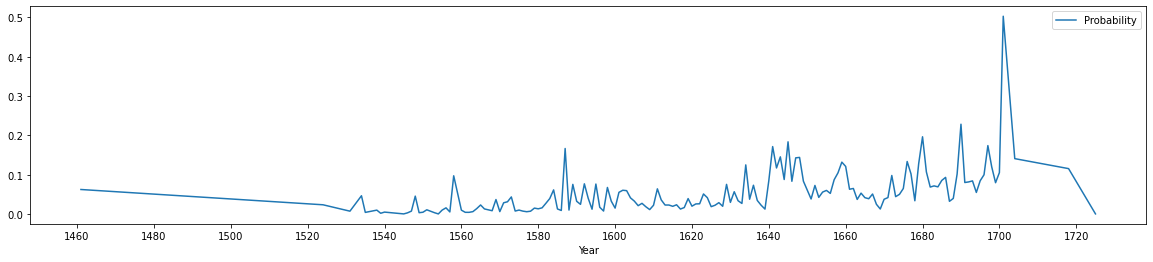

In [261]:
groupedProbabilities12.plot(figsize=(20,4)) #plot dataframe, increase figure size from its tiny default value
plt.xticks(range(1460,1740,20))
plt.show()

Great! Now let's try to add the other topics we're interested in.

<h3> Topic 26 </h3>

In [195]:
#let's get the probabilities for topic 26
topic26probability = []
document_probability26 = ()
document_number = 0
for document in all_topics:
    documentTuple = ()
    for topic in document:
        if topic[0] == 25: #gensim starts indexing at 0
            topic_probability = topic[1]
            documentTuple = (document_number, topic[1])
            topic26probability.append(documentTuple)
    document_number += 1

In [262]:
topic26probabilityNoIndices = [] #remove indices

for x in topic26probability:
    topic26probabilityNoIndices.append(x[1])

In [263]:
topic26probabilityNoIndices[:10]

[0.2855609,
 0.018389387,
 0.041707538,
 0.00024928665,
 0.00026132184,
 0.00024453574,
 0.00028913407,
 0.00030303406,
 0.00026309653,
 0.00029499625]

In [264]:
probabilitiesArray26 = np.asarray(topic26probabilityNoIndices) #convert probabilities list to array
df26 = dates_df
df26["Probability"] = probabilitiesArray26 #add probabilities to dataframe as a new column called 'Probability'

In [265]:
df26.head()

,Year,Probability
0,1661,0.285561
5,1551,0.018389
10,1551,0.041708
15,1551,0.000249
20,1551,0.000261


In [266]:
groupedProbabilities26 = df26.groupby(['Year']).mean()

In [267]:
groupedProbabilities26

,Probability
Year,
1461,0.024613
1524,0.001041
1531,0.000273
1534,0.002719
1535,0.003761
...,...
1701,0.091414
1704,0.501478
1718,0.077292


In [268]:
groupedProbabilities26 = groupedProbabilities26.drop('None')
groupedProbabilities26.index = groupedProbabilities26.index.astype(int)

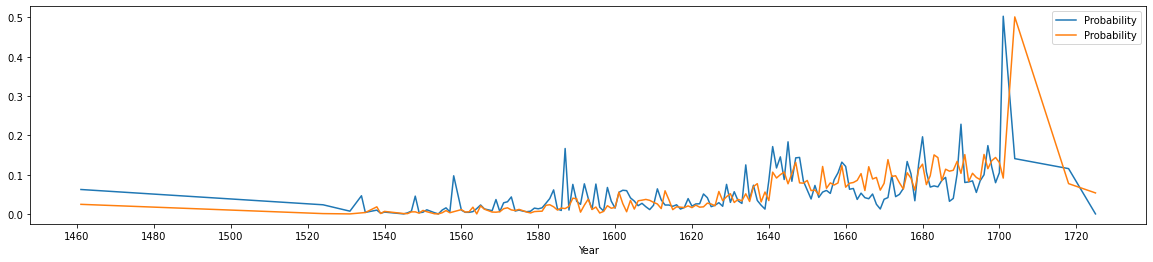

In [314]:
ax = groupedProbabilities12.plot(figsize=(20,4))
groupedProbabilities26.plot(ax=ax)
plt.xticks(range(1460,1740,20))
plt.show()

<h3> Topic 14 </h3>

In [273]:
topic14probability = []
document_probability14 = ()
document_number = 0
for document in all_topics:
    documentTuple = ()
    for topic in document:
        if topic[0] == 13: #gensim starts indexing at 0
            topic_probability = topic[1]
            documentTuple = (document_number, topic[1])
            topic14probability.append(documentTuple)
    document_number += 1
            

In [274]:
len(topic14probability) #should be equal to the number of documents, i.e. 40116

40116

In [275]:
topic14probability[:10] #show the topic 13 probability for each of the first ten documents

[(0, 0.16110179),
 (1, 0.000259521),
 (2, 0.00018937707),
 (3, 0.0002492866),
 (4, 0.00026132187),
 (5, 0.0002445356),
 (6, 0.00028911792),
 (7, 0.00030303534),
 (8, 0.00026309653),
 (9, 0.00029499608)]

In [276]:
topic14probabilityNoIndices = [] #remove indices

for x in topic14probability:
    topic14probabilityNoIndices.append(x[1])

In [277]:
topic14probabilityNoIndices[:10]

[0.16110179,
 0.000259521,
 0.00018937707,
 0.0002492866,
 0.00026132187,
 0.0002445356,
 0.00028911792,
 0.00030303534,
 0.00026309653,
 0.00029499608]

In [278]:
probabilitiesArray14 = np.asarray(topic14probabilityNoIndices) #convert probabilities list to array
df14 = dates_df
df14["Probability"] = probabilitiesArray14 #add probabilities to dataframe as a new column called 'Probability'

In [279]:
df14.head()

,Year,Probability
0,1661,0.161102
5,1551,0.000260
10,1551,0.000189
15,1551,0.000249
20,1551,0.000261


In [280]:
groupedProbabilities14 = df14.groupby(['Year']).mean()

In [282]:
groupedProbabilities14

,Probability
Year,
1461,0.226699
1524,0.000294
1531,0.000915
1534,0.004267
1535,0.002046
...,...
1701,0.212551
1704,0.066450
1718,0.406771


In [283]:
groupedProbabilities14 = groupedProbabilities14.drop('None')
groupedProbabilities14.index = groupedProbabilities14.index.astype(int)

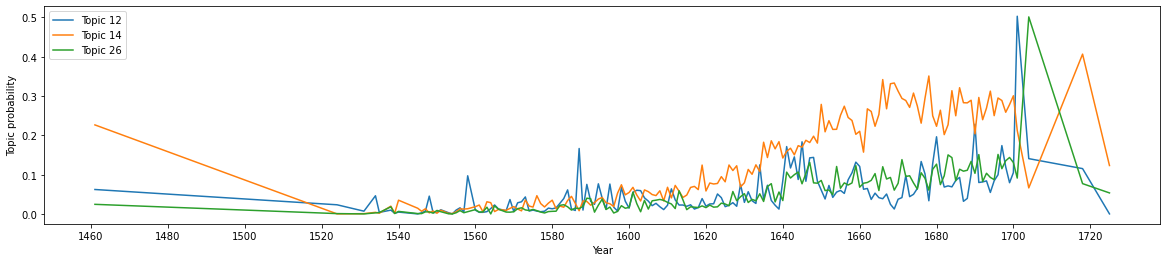

In [315]:
ax = groupedProbabilities12.plot(figsize=(20,4))
groupedProbabilities14.plot(ax=ax)
groupedProbabilities26.plot(ax=ax)
ax.set_ylabel("Topic probability")
ax.legend(["Topic 12", "Topic 14", "Topic 26"])
plt.xticks(range(1460,1740,20))
plt.show()

<h3> Calculating the average probabilities </h3>

Let's add a graph of the average probability of all three topics.

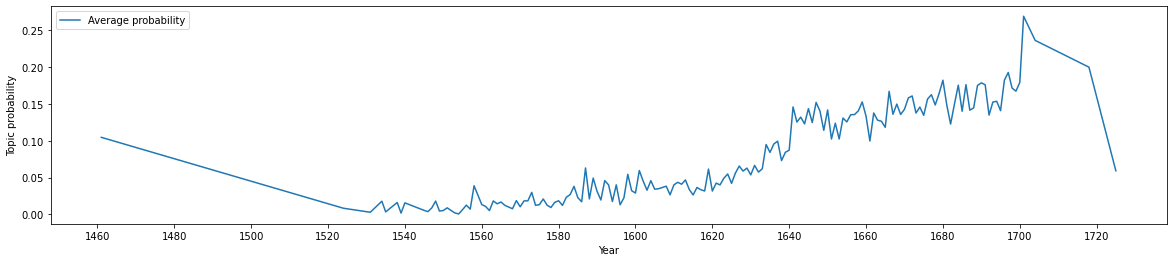

In [316]:
meanProbabilities = pd.concat([groupedProbabilities12, groupedProbabilities14, groupedProbabilities26]).groupby(level=0).mean()
ax = meanProbabilities.plot(figsize=(20,4))
ax.set_ylabel("Topic probability")
ax.legend(["Average probability"])
plt.xticks(range(1460,1740,20))
plt.show()

Great! It might be nice to add a rolling average so we can identify the trends more clearly.

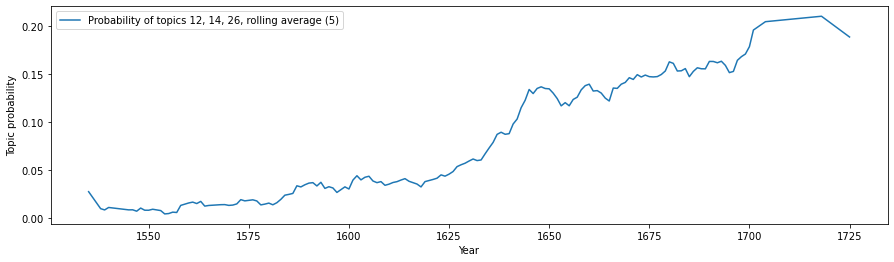

In [308]:
meanProbabilities = pd.concat([groupedProbabilities12, groupedProbabilities14, groupedProbabilities26]).groupby(level=0).mean()
ax = meanProbabilities.rolling(5).mean().plot(figsize=(15,4))
ax.set_ylabel("Topic probability")
ax.legend(["Probability of topics 12, 14, 26, rolling average (5)"])
#plt.xticks(range(1460,1740,20))
plt.show()

Note that it is topic 14 that is pulling up the average from about 1640; without topic 14, the average would look like this. 

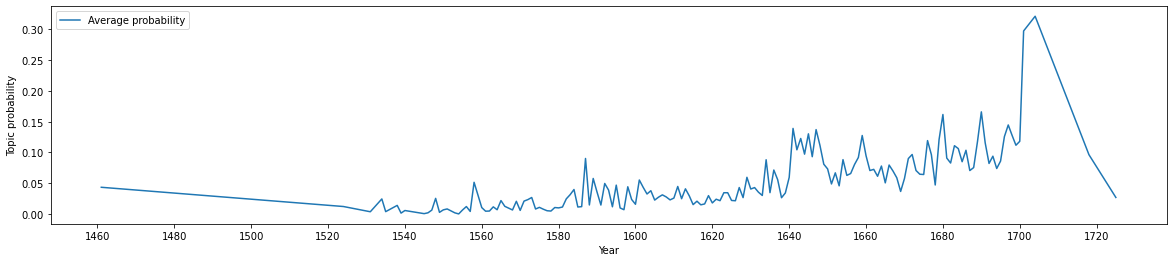

In [317]:
meanProbabilities = pd.concat([groupedProbabilities12, groupedProbabilities26]).groupby(level=0).mean()
ax = meanProbabilities.plot(figsize=(20,4))
ax.set_ylabel("Topic probability")
ax.legend(["Average probability"])
plt.xticks(range(1460,1740,20))
plt.show()

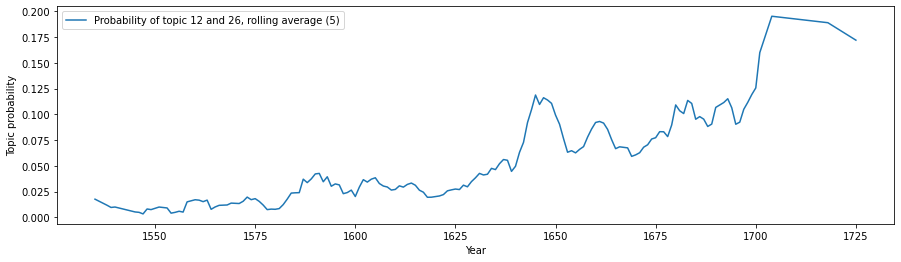

In [306]:
meanRollingProbabilities = pd.concat([groupedProbabilities12, groupedProbabilities26]).groupby(level=0).mean()
ax = meanRollingProbabilities.rolling(5).mean().plot(figsize=(15,4))
ax.set_ylabel("Topic probability")
ax.legend(["Probability of topic 12 and 26, rolling average (5)"])

Here the trends are much more distinctive starting in 1640 or so. This is something we should keep in mind for our analysis section.